# 분석일자
(2021.05.03)

In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

import warnings
warnings.filterwarnings('ignore')

print("파이썬 버전 :",sys.version)
print("판다스 버전 :",pd.__version__)
print("넘파이 버전 :",np.__version__)

파이썬 버전 : 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
판다스 버전 : 1.1.3
넘파이 버전 : 1.18.5


In [2]:
# 데이터 확인
path = "C:/Users/parkgun/Desktop/프리온보딩/팀프로젝트_1주차/data"
print(os.listdir(path))

# 데이터 불러오기
df = pd.read_csv(path+"/company_nps_data.csv", encoding="cp949")
display(df.head())

['company_nps_data.csv']


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [3]:
# 시계열 데이터를 만들자

# 연도와 월을 묶어서 컬럼 형성
df['년월'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

# 회사ID, 연도와 월을 제거해보자
df.drop(df[['년도','월']], axis=1, inplace=True)

# 시간순으로 나열해보자
df= df.sort_values(by='년월')

# 데이터 확인
display(df)

df.info()

,회사ID,연매출액,월별_연금보험료,월별_직원수,년월
9295,391439,2465042,646460,4,201511
47772,381560,10314403,34580380,105,201511
5572,305317,12271715,5065780,18,201511
78461,301480,8353896,5993500,27,201511
28216,242049,2586419,2236500,14,201511
...,...,...,...,...,...
52438,258745,775720,1049920,6,201912
69541,254479,2269625,1260900,5,201912
40130,401386,1512330,829060,3,201912
76502,131998,28298862,17880120,66,201912


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99801 entries, 9295 to 47127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회사ID      99801 non-null  int64 
 1   연매출액      99801 non-null  int64 
 2   월별_연금보험료  99801 non-null  int64 
 3   월별_직원수    99801 non-null  int64 
 4   년월        99801 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [4]:
# # 매출액 700억 / 회사 직원수 400 명 이상만 추출

# df_70_billion = df[df['연매출액']>=70000000]
# df_worker_400 = df_70_billion[df_70_billion['월별_직원수']>=400]
# display(df_worker_400)

In [5]:
# # 데이터 일정 개수 이상만 남긴다.
# new_df = df_worker_400.groupby("회사ID").filter(lambda x : len(x) > 10)

In [6]:
# print("남은 회사 개수 :",new_df['회사ID'].nunique(), "개")

In [7]:
# # 34개의 회사ID를 리스트로 저장합니다.
# list_ID = new_df['회사ID'].unique()

## 상관관계를 분석해봅시다.

In [8]:
# 특정회사를 중심으로 분석해봅시다.
# 을 특정해서 분석한다.


# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

x=126802

df_126802 = df[df['회사ID']==126802]

print(f"{x} 회사 데이터입니다.")

df_126802.drop('회사ID', axis=1,inplace=True) # 회사 ID도 int로 인식

new_df_126802 = df_126802.set_index(['년월']) # 하나의 회사만 존재하기 때문에 index로 설정 / 상관관계분석에 영향 X

# Z-score 표준화
for col in new_df_126802.columns :
    series_mean = new_df_126802[col].mean()
    series_std = new_df_126802[col].std() # 가끔 가다 매출액 혹은 직원 변화량이 없어 0으로 찍히기도 한다. ==> 제외해야 함
    new_df_126802[col] = new_df_126802[col].apply(lambda x: (x-series_mean)/series_std)

display(new_df_126802.head())

126802 회사 데이터입니다.


,연매출액,월별_연금보험료,월별_직원수
년월,,,
201511,-1.156172,-1.030553,-1.165447
201512,-1.156172,-1.048432,-1.153926
201601,-1.098693,-1.008074,-1.084799
201602,-1.098693,-0.989183,-1.050236
201603,-1.098693,-0.961765,-1.015673


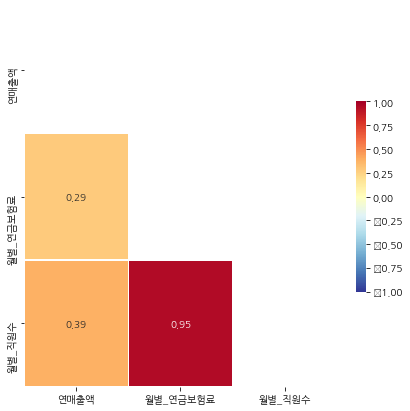

In [10]:
# 상관관계 시각화 
corr_df = new_df_126802.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 히트맵을 그린다
sns.heatmap(corr_df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


# 연매출액과 직원수는 큰 상관관계를 보이지 않는다.